In [83]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
# read the data
dataset = pd.read_csv('neat_crude_cut_properties.csv')

In [22]:
# show dataset 
dataset

,SampleID,VR CCR Lab,VR Asp Lab,W_IBP-15 Lab,W_C5-105 Lab,W_105-165 Lab,W_165-227 Lab,W_227-270 lab,W_270-370 lab,W_370-390 Lab,...,4032,4025,4020,4016,4015,4013,4009,4005,4001,4000
0,AF_001_1010_120107_LP,30.10,21.6,0.61,5.77,6.27,7.72,5.50,13.66,0.05,...,0.005060,0.004777,0.004628,0.004538,0.004518,0.004478,0.004399,0.004317,0.004231,0.004210
1,AF_001_2013_141227_TBP,31.40,21.9,0.56,6.30,5.57,6.81,5.03,13.49,0.95,...,0.005215,0.004953,0.004817,0.004729,0.004710,0.004671,0.004594,0.004511,0.004428,0.004407
2,AF_001_2083_150309_STC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005197,0.004927,0.004785,0.004696,0.004676,0.004636,0.004554,0.004473,0.004391,0.004371
3,AF_001_2111_150409_STC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.005155,0.004882,0.004738,0.004646,0.004625,0.004584,0.004501,0.004416,0.004330,0.004309
4,AF_001_2145_150504_TBP,30.70,23.8,0.61,4.45,4.72,6.42,5.20,13.38,1.35,...,0.005194,0.004911,0.004765,0.004675,0.004656,0.004619,0.004544,0.004463,0.004378,0.004357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,UN_029_1065_111225_LP,10.90,NaN,0.30,6.00,8.20,9.60,8.60,24.30,0.00,...,0.005324,0.005030,0.004891,0.004814,0.004796,0.004761,0.004681,0.004586,0.004479,0.004453
2960,UN_029_1664_140124_TBP,11.29,1.3,0.76,7.99,10.75,11.98,9.84,21.31,0.04,...,0.005386,0.005043,0.004888,0.004808,0.004789,0.004749,0.004650,0.004553,0.004434,0.004405
2961,UN_029_2619_160920_TBP,12.21,1.0,0.87,8.27,10.74,11.85,9.33,22.48,1.32,...,0.005307,0.004997,0.004851,0.004765,0.004745,0.004702,0.004607,0.004493,0.004368,0.004338
2962,UN_029_9073_190325_TBP,11.90,1.5,0.62,7.92,11.84,12.21,9.75,22.47,0.29,...,0.005296,0.004982,0.004842,0.004765,0.004747,0.004708,0.004613,0.004492,0.004355,0.004323


In [23]:
# drop all the raw with even one NaN number 
dataset.dropna()

,SampleID,VR CCR Lab,VR Asp Lab,W_IBP-15 Lab,W_C5-105 Lab,W_105-165 Lab,W_165-227 Lab,W_227-270 lab,W_270-370 lab,W_370-390 Lab,...,4032,4025,4020,4016,4015,4013,4009,4005,4001,4000
0,AF_001_1010_120107_LP,30.10,21.6,0.61,5.77,6.27,7.72,5.50,13.66,0.05,...,0.005060,0.004777,0.004628,0.004538,0.004518,0.004478,0.004399,0.004317,0.004231,0.004210
1,AF_001_2013_141227_TBP,31.40,21.9,0.56,6.30,5.57,6.81,5.03,13.49,0.95,...,0.005215,0.004953,0.004817,0.004729,0.004710,0.004671,0.004594,0.004511,0.004428,0.004407
4,AF_001_2145_150504_TBP,30.70,23.8,0.61,4.45,4.72,6.42,5.20,13.38,1.35,...,0.005194,0.004911,0.004765,0.004675,0.004656,0.004619,0.004544,0.004463,0.004378,0.004357
11,AF_001_2430_160325_TBP,27.66,21.4,0.50,5.63,4.59,5.96,5.41,13.68,1.28,...,0.005234,0.004961,0.004818,0.004730,0.004710,0.004672,0.004597,0.004520,0.004439,0.004419
16,AF_001_2727_161214_TBP,29.60,19.4,0.50,4.32,5.29,6.51,5.17,13.76,1.03,...,0.005051,0.004765,0.004619,0.004529,0.004509,0.004467,0.004383,0.004298,0.004208,0.004186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,UN_028_9425_170919_TBP,23.60,21.7,0.29,3.33,2.91,5.57,2.96,13.47,0.23,...,0.005362,0.005127,0.004987,0.004894,0.004872,0.004828,0.004739,0.004668,0.004593,0.004574
2960,UN_029_1664_140124_TBP,11.29,1.3,0.76,7.99,10.75,11.98,9.84,21.31,0.04,...,0.005386,0.005043,0.004888,0.004808,0.004789,0.004749,0.004650,0.004553,0.004434,0.004405
2961,UN_029_2619_160920_TBP,12.21,1.0,0.87,8.27,10.74,11.85,9.33,22.48,1.32,...,0.005307,0.004997,0.004851,0.004765,0.004745,0.004702,0.004607,0.004493,0.004368,0.004338
2962,UN_029_9073_190325_TBP,11.90,1.5,0.62,7.92,11.84,12.21,9.75,22.47,0.29,...,0.005296,0.004982,0.004842,0.004765,0.004747,0.004708,0.004613,0.004492,0.004355,0.004323


In [24]:
# dataset.colums gives you columns: 3rd and from 13th: to the end]

feature_colums = list (dataset.columns[14:])
output_colums = dataset.columns[3]
feature_colums.append(output_colums)
# feature_colums

In [25]:
# list(dataset.columns)

In [26]:
# cleaned dataset
cleaned_dataset = dataset[feature_colums].dropna()

In [49]:
# Take "cleaned_dataset" and randomly split it into 2 dataframes: train(70% of original data) and test(30% of original data) dataframe using (a) normal code 

type(cleaned_dataset)

msk = np.random.rand(len(cleaned_dataset)) < 0.7

train = cleaned_dataset[msk]

test = cleaned_dataset[~msk]



In [50]:
df = cleaned_dataset.sample(frac=1).reset_index(drop = True)

train = df[int(len(df) * 0.7):]
test = df[:int(len(df) * 0.7)]

In [51]:
def sample2 (dataframe):
    dataframe = dataframe.copy()
    dataframe['hello'] = 0
    return dataframe


sample2(cleaned_dataset)

train = df.sample(frac=0.7,random_state=200) #random state is a seed value
test = df.drop(train.index)

X_train = train[feature_colums[:-1]]
y_train = test[feature_colums[-1]]

X_test = test[feature_colums[:-1]]
y_test = test[feature_colums[-1]]

In [52]:
X = cleaned_dataset[feature_colums[:-1]]
y = cleaned_dataset[feature_colums[-1]]

X_test = test[feature_colums[:-1]]
y_test = test[feature_colums[-1]]

y_test

0      1.39
2      7.27
6      0.69
7      0.21
10     0.81
       ... 
747    0.27
754    0.48
761    0.58
763    0.72
766    0.65
Name: W_IBP-15 Lab, Length: 231, dtype: float64

In [59]:
X = cleaned_dataset[feature_colums[:-1]]
y = cleaned_dataset[feature_colums[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)


In [60]:
y_test

1670    0.68
2004    0.52
1885    0.32
1530    0.71
1056    0.44
        ... 
2772    0.42
2153    0.45
1492    0.89
1408    0.68
1       0.56
Name: W_IBP-15 Lab, Length: 231, dtype: float64

In [77]:
def train_LinearRegression (X, y):
    return LinearRegression().fit(X, y)

In [78]:
model = train_LinearRegression(X_train, y_train)

In [80]:
y_pred = model.predict(X_test)

In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3618534761889801
Mean Squared Error: 0.3357685220885545
Root Mean Squared Error: 0.5794553667786282


In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  1.,  2.,  2.,  3.,  4.,  6., 13.,  7., 10., 15., 15.,
        15., 13., 25., 18., 11., 14.,  8., 12.,  7.,  3.,  1.,  0.,  5.,
         0.,  1.,  1.,  2.,  1.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.62092196, -1.54030258, -1.45968319, -1.37906381, -1.29844443,
        -1.21782505, -1.13720566, -1.05658628, -0.9759669 , -0.89534751,
        -0.81472813, -0.73410875, -0.65348936, -0.57286998, -0.4922506 ,
        -0.41163122, -0.33101183, -0.25039245, -0.16977307, -0.08915368,
        -0.0085343 ,  0.07208508,  0.15270446,  0.23332385,  0.31394323,
         0.39456261,  0.475182  ,  0.55580138,  0.63642076,  0.717040

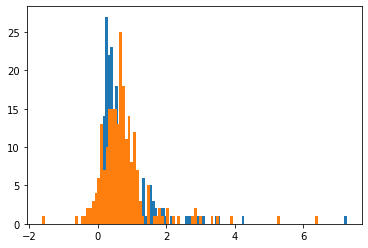

In [87]:
plt.hist(y_test, bins = 100)
plt.hist(y_pred, bins = 100)

In [89]:
y_test.describe()

count    231.000000
mean       0.772208
std        0.780505
min        0.000000
25%        0.305000
50%        0.550000
75%        0.920000
max        7.270000
Name: W_IBP-15 Lab, dtype: float64

In [92]:
pd.Series(y_pred).describe()

count    231.000000
mean       0.753260
std        0.816260
min       -1.620922
25%        0.338025
50%        0.661408
75%        0.933995
max        6.441016
dtype: float64